In [2]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
from GraphST import GraphST
import matplotlib.pyplot as plt
import numpy as np
import anndata

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = '/data02/tguo/miniconda3/envs/GraphST/lib/R'

saggital mouse brain 

In [16]:
dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# adata=sc.read_h5ad(dirs+'GraphSTdata/mouse_anterior_posterior_brain_merged.h5ad')
# samples=["all_posterior1","all_posterior2","all_anterior1","all_anterior2"]
# samples=["posterior1","posterior2"]
samples=["anterior1","anterior2"]
feat_file=[]
edge_file=[]
meta_file=[]
coord_file=[]
flags=''
for i in range(len(samples)):
    feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
    meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
    coord_file.append(dirs+"gtt_input/"+str(samples[i])+"_coord.csv")
    flags=flags+'_'+samples[i]
    
feat=pd.read_csv(feat_file[0],header=0,index_col=0)
meta=pd.read_csv(meta_file[0],header=0,index_col=0)
coord=pd.read_csv(coord_file[0],header=0,index_col=0)
for i in np.arange(1,len(samples)):
    feat=pd.concat((feat,pd.read_csv(feat_file[i],header=0,index_col=0)))
    meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)))
    coord=pd.concat((coord,pd.read_csv(coord_file[i],header=0,index_col=0)))
meta=meta.loc[feat.index,:]
coord=coord.loc[feat.index,:]
adata=anndata.AnnData(feat)
adata.obs['celltype']=meta.loc[:,'celltype']
adata.obs['batch']=meta.loc[:,'batch']
adata.obsm['spatial']=coord.loc[adata.obs_names,:].values

/tmp/ipykernel_18030/392590967.py:26: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)


coronal mouse brain 

In [26]:
dirs="/data02/tguo/space_batch_effect/Hippo/"
samples=["10X_Normal","10X_DAPI","10X_FFPE"]
net_cate='_KNN_'
knn=6
feat_file=[]
edge_file=[]
meta_file=[]
coord_file=[]
flags=''
for i in range(len(samples)):
    feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
    edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge"+net_cate+str(knn)+".csv")
    meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
    coord_file.append(dirs+"gtt_input/"+str(samples[i])+"_coord.csv")
    flags=flags+'_'+samples[i]
    
feat=pd.read_csv(feat_file[0],header=0,index_col=0)
meta=pd.read_csv(meta_file[0],header=0,index_col=0)
coord=pd.read_csv(coord_file[0],header=0,index_col=0)
paste_coord=pd.read_csv(dirs+"methods/"+"paste_new_coord"+flags+".csv",header=0,index_col=0)
for i in np.arange(1,len(samples)):
    feat=pd.concat((feat,pd.read_csv(feat_file[i],header=0,index_col=0)))
    meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)))
    coord=pd.concat((coord,pd.read_csv(coord_file[i],header=0,index_col=0)))
meta=meta.loc[feat.index,:]
coord=coord.loc[feat.index,:]
adata=anndata.AnnData(feat)
adata.obs['celltype']=meta.loc[:,'celltype']
adata.obs['batch']=meta.loc[:,'batch']
coord.columns=['y','x']
adata.obsm['spatial']=paste_coord.loc[adata.obs_names,:].values

DLPFC

In [3]:
dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
sample_name=np.array([151507,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676])
IDX=[[0,1],[1,2],[2,3],[4,5],[5,6],[6,7],[8,9],[9,10],[10,11]]
SEP=','
net_cate='_KNN_'
knn=6

P_WALK=knn
WALK_LEN=1
N_WALK_LEN=knn
NUM_NEG=knn
for idx in np.arange(len(IDX)):
    samples=sample_name[IDX[idx]]
    feat_file=[]
    meta_file=[]
    coord_file=[]
    flags=''
    flags1=str(samples[0])
    for i in range(1,len(samples)):
        flags1=flags1+'-'+str(samples[i])
    for i in range(len(samples)):
        feat_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_features.txt")
        meta_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_label.txt")
        coord_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_positions.txt")
        flags=flags+'_'+str(samples[i])

    feat=pd.read_csv(feat_file[0],header=0,index_col=0)
    meta=pd.read_csv(meta_file[0],header=0,index_col=0)
    coord=pd.read_csv(coord_file[0],header=0,index_col=0)
    paste_coord=pd.read_csv(dirs+"methods/"+"paste_new_coord"+flags+".csv",header=0,index_col=0)
    for i in np.arange(1,len(samples)):
        feat=pd.concat((feat,pd.read_csv(feat_file[i],header=0,index_col=0)))
        meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)))
        coord=pd.concat((coord,pd.read_csv(coord_file[i],header=0,index_col=0)))
    meta=meta.loc[feat.index,:]
    coord=coord.loc[feat.index,:]
    adata=anndata.AnnData(feat)
    adata.obs['celltype']=meta.loc[:,'celltype']
    adata.obs['batch']=meta.loc[:,'batch']
    coord.columns=['y','x']
    adata.obsm['spatial']=paste_coord.loc[adata.obs_names,:].values

    adata.var_names_make_unique()
    # define model
    model = GraphST.GraphST(adata, device=device)
    # run model
    adata = model.train()
    emb_names=['GraphST-'+str(i) for i in np.arange(adata.obsm['emb'].shape[1])]
    embed=pd.DataFrame(adata.obsm['emb'],index=adata.obs_names,columns=emb_names)
    embed.to_csv(dirs+"methods/GraphST_mat"+flags+".txt")

/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:30<00:00,  6.63it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:41<00:00,  5.91it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:46<00:00,  5.63it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:01<00:00,  9.80it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:12<00:00,  8.26it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:21<00:00,  7.41it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:08<00:00,  8.75it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:08<00:00,  8.71it/s]


Optimization finished for ST data!


/tmp/ipykernel_23588/2085604719.py:37: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)
/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [01:03<00:00,  9.40it/s]


Optimization finished for ST data!


mouse ob

In [ ]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
samples=["BGI","SlideV2"]
net_cate='_KNN_'
knn=8
feat_file=[]
edge_file=[]
meta_file=[]
coord_file=[]
flags=''
for i in range(len(samples)):
    feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
    edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge"+net_cate+str(knn)+".csv")
    meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
    coord_file.append(dirs+"gtt_input/"+str(samples[i])+"_coord.csv")
    flags=flags+'_'+samples[i]
    
feat=pd.read_csv(feat_file[0],header=0,index_col=0)
meta=pd.read_csv(meta_file[0],header=0,index_col=0)
coord=pd.read_csv(coord_file[0],header=0,index_col=0)
paste_coord=pd.read_csv(dirs+"methods/"+"paste_new_coord"+flags+".csv",header=0,index_col=0)
for i in np.arange(1,len(samples)):
    feat=pd.concat((feat,pd.read_csv(feat_file[i],header=0,index_col=0)))
    meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)))
    coord=pd.concat((coord,pd.read_csv(coord_file[i],header=0,index_col=0)))
meta=meta.loc[feat.index,:]
coord=coord.loc[feat.index,:]
adata=anndata.AnnData(feat)
adata.obs['celltype']=meta.loc[:,'celltype']
adata.obs['batch']=meta.loc[:,'batch']
coord.columns=['y','x']
adata.obsm['spatial']=paste_coord.values

simulate

In [3]:
dirs="/data02/tguo/space_batch_effect/simulate/"
batch_sim="_1"
types=""
B=2
SEP=','
net_cate='_KNN_'
flags=batch_sim+types


knn=10

feat_file=[]
edge_file=[]
meta_file=[]
coord_file=[]
for i in range(B):
    feat_file.append(dirs+"gtt_input/feat"+str(i+1)+flags+".csv")
    edge_file.append(dirs+"gtt_input/edge"+str(i+1)+net_cate+str(knn)+flags+".csv")
    meta_file.append(dirs+"gtt_input/meta"+str(i+1)+flags+".csv")
    coord_file.append(dirs+"gtt_input/coord"+str(i+1)+flags+".csv")

feat=pd.read_csv(feat_file[0],header=0,index_col=0)
meta=pd.read_csv(meta_file[0],header=0,index_col=0)
coord=pd.read_csv(coord_file[0],header=0,index_col=0)
paste_coord=pd.read_csv(dirs+"methods/"+"paste_new_coord"+flags+".csv",header=0,index_col=0)
for i in np.arange(1,B):
    feat=pd.concat((feat,pd.read_csv(feat_file[i],header=0,index_col=0)))
    meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)))
    coord=pd.concat((coord,pd.read_csv(coord_file[i],header=0,index_col=0)))
meta=meta.loc[feat.index,:]
coord=coord.loc[feat.index,:]
adata=anndata.AnnData(feat)
adata.obs['celltype']=meta.loc[:,'celltype']
adata.obs['batch']=meta.loc[:,'batch']
coord=coord.loc[:,['x','y']]
adata.obsm['spatial']=paste_coord.values

/tmp/ipykernel_18552/2381655733.py:32: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=anndata.AnnData(feat)


train model

In [17]:
adata.var_names_make_unique()
# define model
model = GraphST.GraphST(adata, device=device)
# run model
adata = model.train()
emb_names=['GraphST-'+str(i) for i in np.arange(adata.obsm['emb'].shape[1])]
embed=pd.DataFrame(adata.obsm['emb'],index=adata.obs_names,columns=emb_names)
embed.to_csv(dirs+"methods/GraphST_mat"+flags+".txt")

/home/tguo/tguo2/miniconda3/envs/GraphST/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:45<00:00, 13.07it/s]


Optimization finished for ST data!


In [ ]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
# x=PCA(n_components=30).fit_transform(SPII.feat)
# embed=pd.read_csv(dirs+"gtt_output/AGC_embed"+flags+"_xent.csv",index_col=0,header=0).values
celltype=adata.obs.loc[:,'celltype'].values
batch=adata.obs.loc[:,'batch'].values
ul=np.unique(celltype)
ub=np.unique(batch)
x=PCA(n_components=30).fit_transform(embed.values)
umap_mat=umap.UMAP().fit_transform(x)
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [42]:
from GraphST.utils import clustering

tool = 'mclust' # mclust, leiden, and louvain
n_clusters=20
# clustering
from GraphST.utils import clustering

if tool == 'mclust':
    clustering(adata, n_clusters, method=tool) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
    clustering(adata, n_clusters, method=tool, start=0.1, end=2.0, increment=0.01)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


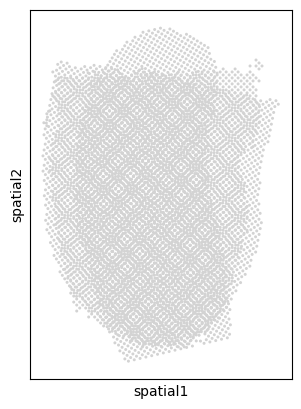

In [37]:
sc.pl.spatial(adata,spot_size=1)

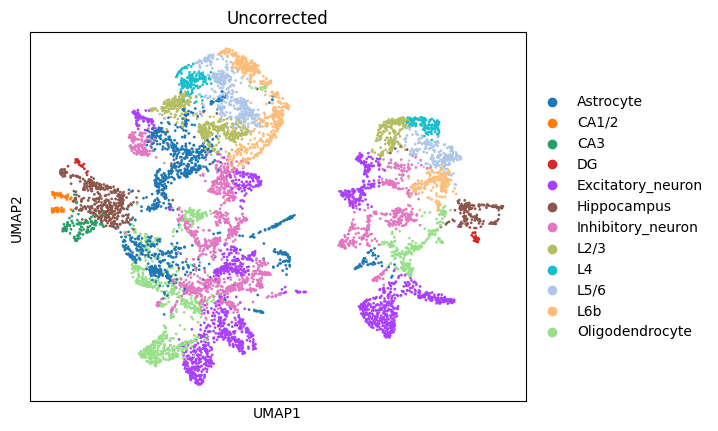

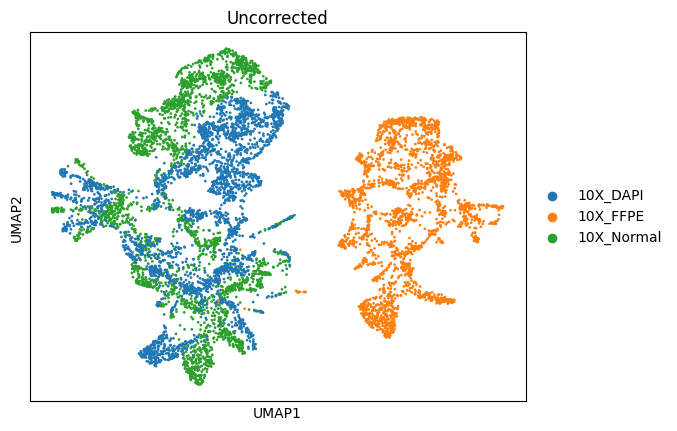

In [47]:
# fig, ax_list = plt.subplots(1, 3, figsize=(12, 3))
# sc.pp.pca(adata)
# sc.pp.neighbors(adata, use_rep='X_pca', n_neighbors=10, n_pcs=40)
# sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype', title='Uncorrected')
sc.pl.umap(adata, color='batch', title='Uncorrected')

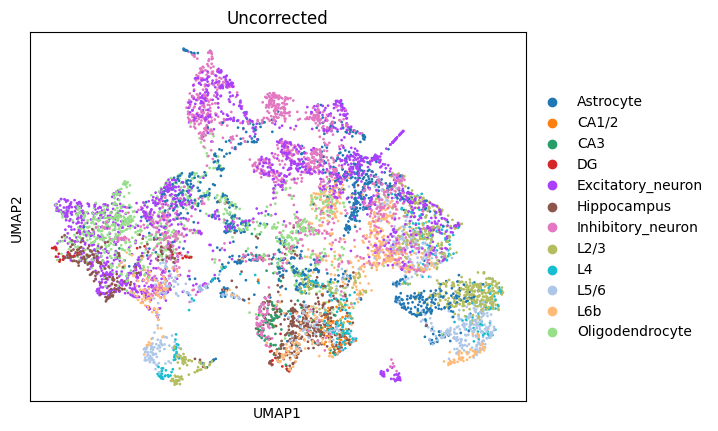

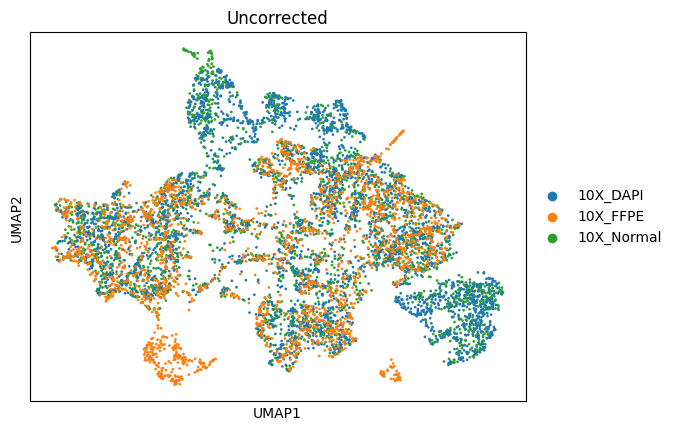

In [48]:
sc.pp.neighbors(adata, use_rep='emb_pca', n_neighbors=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype', title='Uncorrected')
sc.pl.umap(adata, color='batch', title='Uncorrected')